In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('seaborn-poster') 

In [2]:
df = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit3/Data/housing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
from sklearn.model_selection import train_test_split #continued from class 11 notes

In [22]:
X = df.iloc[:, :-1]
y = df['PRICE']

In [25]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019) 

In [27]:
X_test.shape

(102, 13)

In [28]:
del y_test # delete the y test. 

In [30]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [31]:
lreg.fit(X_train, y_train)
#fit model on training set. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lreg.predict(X_test) 
#this is the output of your model on the X test data. Model has never actually seen this data. 
#how accurate is our model? This is what we will be evaluated on. 

array([20.33192034, 30.56150855, 11.42198946, 16.8970806 , 27.01912782,
       12.77729555, 25.41460999, 23.95267008, 33.79154132, 33.50126749,
       25.05429557, 31.66430227, 19.98285258, 12.4616218 , -6.66297423,
       23.36867493, 14.92932538, 44.05472038, 22.81669548,  3.72098139,
       31.25746504, 20.68406647, 22.9425323 , 19.37448096, 12.91699241,
       32.99373116, 21.81521649, 24.14498433, 18.41220509, 31.15685856,
       16.76006243, 22.72843014, 19.40334092, 28.75501841, 17.70196598,
       17.23717678, 18.22754471, 13.96560217, 28.73279778, 20.19961892,
       36.2948616 , 17.91369056, 21.34274873, 20.02922409, 31.41285753,
       32.01264434, 22.77358347, 35.02549046, 16.89214363,  3.59801458,
       21.16194967, 23.74010706, 16.04165109, 28.36558986, 25.12232923,
       23.44071444, 19.97735813, 33.37129595, 14.00816978, 19.54187977,
       22.52890094, 25.30659334, 12.14810149, 16.59211993, 13.73365327,
       30.68379456, 31.574453  , 28.95691257,  8.72573318, 28.99

In [33]:
# Create a validation set from our training set. Data is already shuffled and does not need to be shuffled again.
# This takes the last 100 rows of our training set and turn it itno our validation set
X_val, y_val = X_train[-100:].copy(), y_train[-100:].copy()

In [34]:
X_val.shape

(100, 13)

In [37]:
X_val.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
421,7.02259,0.0,18.10,0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27
130,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,395.04,12.60


In [36]:
y_val.head()

421    14.2
488    15.2
349    26.6
108    19.8
130    19.2
Name: PRICE, dtype: float64

In [38]:
X_train, y_train = X_train[:-100].copy(), y_train[:-100].copy()
#redefine the training set so that it excludes the validation set. 

In [39]:
X_train.shape
#notice it is now 304 rows instead of the original 404

(304, 13)

In [41]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lreg.score(X_val, y_val) #Validation score

0.6599281939410874

In [ ]:
#Kfolds give you a thourgh way to choose the best validation method.

In [ ]:
#1. Kfold cross validaiton set (only used one the training set)
    #Intro: A way to validate data more thorogh to perfrom coss validation
    #Split training set into K different groups
    #K represents different groups or splits of seperating your data
    #For K round, trian your data on K-1 groups and score it on the one remaining
        #always have the same number of rounds and folds
        #every row is used only once but all the colms stay the same. 
            #Note the more folds you have, the more sensitive your model is to outliers. 
            #The fewer folds will be blown out by outliers.
            #Generally speaking 10 is an apporiate number folds.
            #See images for addtional notes. 
    #Exercise
    
#2. Model Prep
    #a. Missing Values:
        #Diff Types
        #Imputation
    #b. Catagoiral encoding 
        #Into
        #Techniques
#Bonus Assignment

In [45]:
#Kfold exercise looking at the compact version 

from sklearn.model_selection import cross_val_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019) 

In [50]:
scores = cross_val_score(estimator=lreg, X=X_train, y=y_train, cv=10) #CV = number of folds

In [51]:
scores #shows the validation score from all of our folds. 
            #Best case: .817
            #Worst case: .54

array([0.74469313, 0.72965599, 0.78482663, 0.65675571, 0.66315517,
       0.78283033, 0.81788242, 0.79596427, 0.5480151 , 0.75188945])

In [ ]:
#from sklearn.model_selection import KFold 
#This method provides more control and more detail about the folds. this will be in a follow up notebook 
#kfold = KFold()

In [53]:
np.mean(scores) 

0.7275668192780946

In [54]:
np.std(scores) #Create an infered spread based on std

0.07839580317172443

In [ ]:
#Kfold Exercise: See if you can improve your model using the cross validation scores
    #non-linear transformation: Square, square root, cubic term
    #interaction term: one variable multiplied by another
    #log transformations: numerically transform a vairable to make it more normal


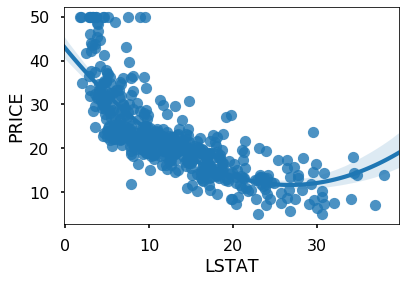

In [56]:
sns.regplot(x='LSTAT', y='PRICE', data=df, order=2); #Adding a polynoimnal term - no longer behaves linearly
#order means if you take the colm and raise it to the power of 2
#Generally speaking people do not want to live in bad hoods 
    #but at somepoint you cannot pay them to live in certain places
    #this line curves with the data

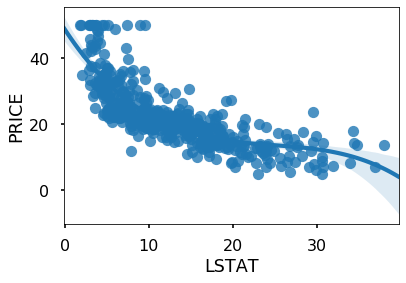

In [57]:
sns.regplot(x='LSTAT', y='PRICE', data=df, order=3);
#Allows you to capture no-linear relations when dealing with regression
#the higher the order number, the more brittle it becomes and turns into an overfit mess.
#This line is ~ accross data

In [59]:
df['CRIM']*df['LSTAT'] #interaction terms, best to use amongst your most important terms

0        0.031474
1        0.249613
2        0.109979
3        0.095168
4        0.368036
5        0.155519
6        1.097445
7        2.768133
8        6.322413
9        2.907684
10       4.599000
11       1.558827
12       1.473284
13       5.201818
14       6.545470
15       5.313993
16       6.934859
17      11.504214
18       9.383680
19       8.187024
20      26.312626
21      11.783713
22      23.071838
23      19.649988
24      12.229238
25      13.877315
26       9.950987
27      16.515706
28       9.894272
29      12.009351
          ...    
476     90.997939
477    374.232894
478    184.500990
479    187.914807
480     62.549867
481     44.181313
482     40.175432
483     29.367520
484     31.730124
485     38.867429
486     85.262415
487     55.368421
488      2.724532
489      4.395379
490      6.157413
491      1.910722
492      1.486122
493      2.081453
494      3.799356
495      3.150224
496      6.122144
497      3.784158
498      3.089430
499      2.685233
500      3

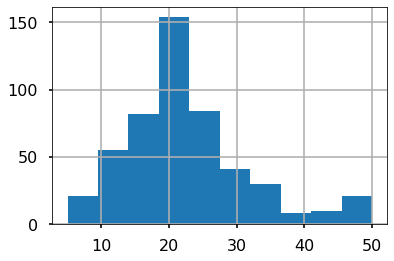

In [62]:
y.hist() #There are outliers so need to transform target variable. 

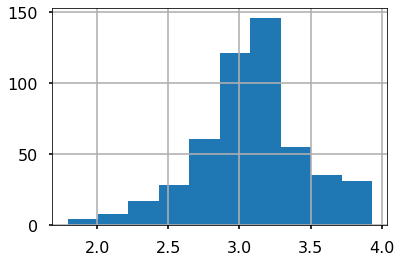

In [60]:
np.log1p(y).hist()
#clean up target variable

In [ ]:
df['LSTAT_2'] = df['LSTAT']**2
df['LSTAT_3'] = df['LSTAT']**3 
#To create new colms that reflect non linear. #As a convention you start with both

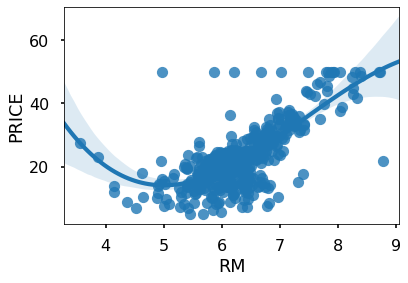

In [70]:
sns.regplot(x='RM', y='PRICE', data=df, order=3); #Non Linear Regression using the square and cube model

In [71]:
df['RM_2'] = df['RM']**2 #adding it to the data set
df['RM_3'] = df['RM']**3 

In [78]:
df['CRIMTAX'] = df['CRIM']*df['TAX']

In [76]:
df['RADLOG'] = np.log1p(df['RAD'])

0      0.693147
1      1.098612
2      1.098612
3      1.386294
4      1.386294
5      1.386294
6      1.791759
7      1.791759
8      1.791759
9      1.791759
10     1.791759
11     1.791759
12     1.791759
13     1.609438
14     1.609438
15     1.609438
16     1.609438
17     1.609438
18     1.609438
19     1.609438
20     1.609438
21     1.609438
22     1.609438
23     1.609438
24     1.609438
25     1.609438
26     1.609438
27     1.609438
28     1.609438
29     1.609438
         ...   
476    3.218876
477    3.218876
478    3.218876
479    3.218876
480    3.218876
481    3.218876
482    3.218876
483    3.218876
484    3.218876
485    3.218876
486    3.218876
487    3.218876
488    1.609438
489    1.609438
490    1.609438
491    1.609438
492    1.609438
493    1.945910
494    1.945910
495    1.945910
496    1.945910
497    1.945910
498    1.945910
499    1.945910
500    1.945910
501    0.693147
502    0.693147
503    0.693147
504    0.693147
505    0.693147
Name: RAD, Length: 506, 

In [80]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,RM_2,RM_3,CRIMTAX
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,43.230625,284.241359,1.87072
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,41.229241,264.732956,6.60902
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,51.624225,370.920057,6.60418
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,48.972004,342.706084,7.18614
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,51.079609,365.065966,15.32910


In [81]:
X = df.loc[:, df.columns != 'PRICE']
y = df['PRICE']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=2019) 

In [83]:
scores = scores = cross_val_score(estimator=lreg, X=X_train, y=y_train, cv=10)

In [84]:
scores

array([0.85614896, 0.77115352, 0.90023683, 0.67655296, 0.81876332,
       0.86737355, 0.82022674, 0.86789732, 0.66570168, 0.79170784])

In [85]:
scores.mean()

0.803576273665328

In [86]:
#Notes on Data Prep: cross validation, model prep
    #filing in missing values 
    #dealing with catagorical values 
    
tt = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit2/data/titanic.csv')

In [87]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# missing data: two big issues 1. is it randomly generated? 2. Does it encode for something specific
#determines wether or not empty values should be filled with a single value (ie None, 0, etc.) or 
#imputed (avg, mode, or more elaborate measures)
#Non-random values input a small number to indicate represented 
#randomly generated values needs to be imputed
    #Run a regression to fill values that are missing
    #use groupby and transform to fill in missing values * best one

In [ ]:
#Simple way to fill in random values
tt['Age'] = tt['Age'].fillna(tt['Age'].mean()) #to fill in null values for the average numerical value; use mode for catergorical

In [ ]:
#more elaborate way to fill in missing values: groupby() state to imput missing values
#Use TRANSFORM()!!!!

In [95]:
tt.groupby(['Sex', 'Pclass'])['Age'].mean() #this would be more accurate results

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [97]:
age_group = tt.groupby(['Sex', 'Pclass'])['Age'].transform('mean')

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
5      26.507589
6      41.281386
7      26.507589
8      21.750000
9      28.722973
10     21.750000
11     34.611765
12     26.507589
13     26.507589
14     21.750000
15     28.722973
16     26.507589
17     30.740707
18     21.750000
19     21.750000
20     30.740707
21     30.740707
22     21.750000
23     41.281386
24     21.750000
25     21.750000
26     26.507589
27     41.281386
28     21.750000
29     26.507589
         ...    
861    30.740707
862    34.611765
863    21.750000
864    30.740707
865    28.722973
866    28.722973
867    41.281386
868    26.507589
869    26.507589
870    26.507589
871    34.611765
872    41.281386
873    26.507589
874    28.722973
875    21.750000
876    26.507589
877    26.507589
878    26.507589
879    34.611765
880    28.722973
881    26.507589
882    21.750000
883    30.740707
884    26.507589
885    21.750000
886    30.740707
887    34.611765
888    21.7500

In [ ]:
tt['Age'] = tt['Age'].fillna(age_group) 
#to fill in the variable that have missing values so you do not replace the values you know

In [ ]:
#Categorical Encoding: lots of import information is encoded in text based columms. 
#These are typically more difficult to deal with than numberic colms
#Ordinal encoding - give Colms a numeric rank based on a naturally existing hierarchy: 
    #Small, Med, Large
    #Poor, Fair, Avg, Good, Very Good
    #sometimes these can be inferred
        #V-4, V-6, V-8
        #Fiat, Ford, Audi, Bugatti
    #OneHot Encoding: Binary representation of whether a colm has a particular value
        #male, female
        #red, green, blue, yello, purple
        #commonly used map() and get_dummies( )
        #Common issue - too many colms can blow up your model
        #These are often the most important colms: zip code, medical billing, non repeating text
        General strategy: Reduce to a lower dimension or target encoding

In [98]:
tt['Embarked']

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [99]:
pd.get_dummies(tt['Embarked']) 
#dummy encoding = onehot encoding Binary representation of true or false

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [100]:
pd.get_dummies(tt) #will transform any values and also create a lot more rows. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,NaN,0,0,8.4583,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,7,0,1,54.0,0,0,51.8625,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,2.0,3,1,21.0750,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
pd.get_dummies(tt).shape #this has 1731 colms; this makes it hard to run a model on

(891, 1731)

In [102]:
tt['Name'].nunique() #every name is unique

891

In [105]:
tt['Name'].str.split().str[1] #use the altered colm to compress into smaller unique values

0             Mr.
1            Mrs.
2           Miss.
3            Mrs.
4             Mr.
5             Mr.
6             Mr.
7         Master.
8            Mrs.
9            Mrs.
10          Miss.
11          Miss.
12            Mr.
13            Mr.
14          Miss.
15           Mrs.
16        Master.
17            Mr.
18        Planke,
19           Mrs.
20            Mr.
21            Mr.
22          Miss.
23            Mr.
24          Miss.
25           Mrs.
26            Mr.
27            Mr.
28          Miss.
29            Mr.
          ...    
861           Mr.
862          Mrs.
863         Miss.
864           Mr.
865          Mrs.
866             y
867           Mr.
868    Melkebeke,
869       Master.
870           Mr.
871          Mrs.
872           Mr.
873     Cruyssen,
874          Mrs.
875         Miss.
876           Mr.
877           Mr.
878           Mr.
879          Mrs.
880          Mrs.
881           Mr.
882         Miss.
883           Mr.
884           Mr.
885       

In [106]:
train = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit3/Data/movies/train.csv')

In [107]:
train.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action


In [108]:
train['director'].nunique()

4035

In [110]:
directors = train.groupby('director')['director'].transform('count')

In [111]:
train['director'] = np.where(directors > 15, train['director'], 'Other')

In [112]:
train['director'].value_counts() #takes all the directors who had less than 15 movies to thier name we lump together

Other                   8301
Woody Allen               42
Clint Eastwood            32
Steven Spielberg          28
Martin Scorsese           27
Joel Schumacher           21
Steven Soderbergh         20
Brian De Palma            20
Ridley Scott              20
Ron Howard                20
Wes Craven                19
Tim Burton                18
John Carpenter            18
Mike Nichols              18
Barry Levinson            17
Norman Jewison            17
Oliver Stone              17
Francis Ford Coppola      17
David Cronenberg          17
Sidney Lumet              17
Blake Edwards             16
Tony Scott                16
Robert Zemeckis           16
Peter Hyams               16
Richard Donner            16
John Landis               16
Walter Hill               16
Stephen Herek             16
Rob Reiner                16
Roman Polanski            16
Name: director, dtype: int64

In [115]:
test = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit3/Data/movies/test.csv')

#Target var is revenue not on the test set. upload predicitions of revenue for the test set to git hub. 
#Note 0 does not mean 0 it just means that when adjusted for inflation they made no money 

In [116]:
test.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj
0,8866,2.944554,60000000,Jack Reacher,Tom Cruise|Rosamund Pike|Richard Jenkins|David...,http://www.jackreachermovie.com/,Christopher McQuarrie,The Law Has Limits. He Does Not.,based on novel|sniper|investigation|police|cha...,"In an innocent heartland city, five are shot d...",130,Crime|Drama|Thriller,Paramount Pictures|Mutual Film Company|Skydanc...,2012-12-20,2281,6.2,2012,56984656.88
1,8867,1.095339,35000000,This Is 40,Paul Rudd|Leslie Mann|Jason Segel|Maude Apatow...,http://www.thisis40movie.com/,Judd Apatow,The sort-of sequel to 'Knocked Up',family relationships|claim in title|singing in...,"Pete and Debbie are both about to turn 40, the...",134,Comedy,Apatow Productions,2012-12-20,693,5.5,2012,33241049.85
2,8868,0.158310,20000000,Not Fade Away,Bella Heathcote|Jack Huston|Dominique McElligo...,NaN,David Chase,there is no past no future either. just the Now--,new jersey|rock band|country club,"Set in suburban New Jersey in the 1960s, a gro...",112,Drama,Paramount Vantage,2012-12-21,14,5.4,2012,18994885.63
3,8869,0.055792,0,Minecraft: The Story of Mojang,Markus Persson|Jens Bergensten|Jakob Porser|Ca...,http://theminecraftmovie.com/,Paul Owens,NaN,NaN,"Follow Markus ""Notch"" Persson and his co-worke...",104,Documentary,2 Player Productions,2012-12-23,14,5.6,2012,0.00
4,8870,0.074508,0,Naughty or Nice,Hilarie Burton|Matt Dallas|Gabriel Tigerman|Da...,NaN,David Mackay,NaN,christmas,Krissy Kringle receives a delivery intended fo...,90,TV Movie,NaN,2012-12-24,10,7.1,2012,0.00
